# Evaulation

This notebook is setup to help evaluate the runs

In [1]:
%matplotlib inline
from dotmap import DotMap
from envs import *
import os
import dill as pickle
import run_learning
import numpy as np
import run_eval
import run_render
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
from stable_baselines3 import SAC

# Find Desired Runs

In [2]:
#use this to find what hyperparamters we have run on
def look_through_folders():
    for folder in os.listdir("./Runs"):
        folder_param_path = os.path.join(os.path.join("./Runs", folder), "params.pkl")
        if os.path.exists(folder_param_path):
            with open(os.path.join(os.path.join("./Runs", folder), "params.pkl"), 'rb') as f:
                params = pickle.load(f)
            print("Eps: ", str(params.eps), ", Gamma: ", str(params.gamma), ", LearningRate: ", str(params.learning_rate))
            print("Eval_Freq: ", str(params.init_state))
#look_through_folders()

In [30]:
#Filter through run: returns dictionary where values belong to same run
def check(params):
    match = bool(1
        and params.id == 31
        and params.finished == True
        #and params.envs.manipulator.cost_func == 3
        )
        

    return match

def filt(check):
    matches = dict()
    for folder in os.listdir("./Runs"):
        folder_param_path = os.path.join(os.path.join("./Runs", folder), "params.pkl")
        if os.path.exists(folder_param_path):
            with open(os.path.join(os.path.join("./Runs", folder), "params.pkl"), 'rb') as f:
                params = pickle.load(f)
            if check(params):
                if params.trial_id in matches.keys():
                    matches[params.trial_id].append(folder)
                else:   
                    matches[params.trial_id] = [folder]
    return matches
filt(check)

{0: ['03_23_2022_153756_Mohsin',
  '03_23_2022_153731_Mohsin',
  '03_23_2022_171919_Mohsin',
  '03_23_2022_172146_Mohsin'],
 3: ['03_24_2022_032807_Mohsin',
  '03_24_2022_014544_Mohsin',
  '03_24_2022_034607_Mohsin',
  '03_24_2022_020125_Mohsin'],
 4: ['03_24_2022_065130_Mohsin',
  '03_24_2022_071522_Mohsin',
  '03_24_2022_050928_Mohsin',
  '03_24_2022_053028_Mohsin'],
 1: ['03_23_2022_190457_Mohsin',
  '03_23_2022_204850_Mohsin',
  '03_23_2022_204114_Mohsin',
  '03_23_2022_190045_Mohsin'],
 2: ['03_24_2022_001648_Mohsin',
  '03_23_2022_223258_Mohsin',
  '03_23_2022_222207_Mohsin',
  '03_24_2022_000351_Mohsin']}

# Evaluate Desired Runs

### Manipulator

/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN',

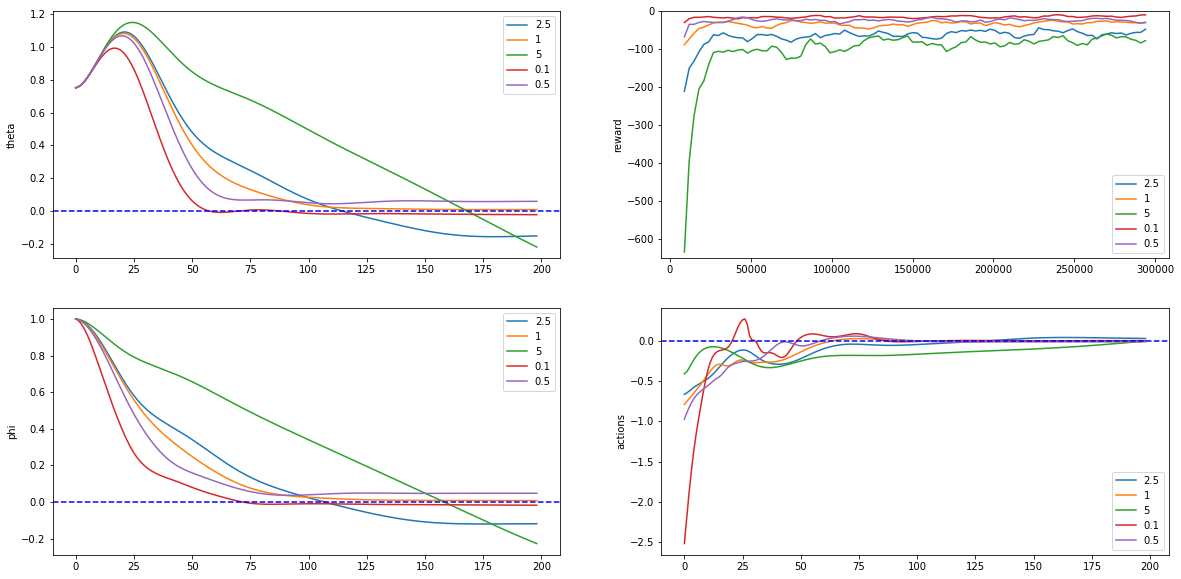

In [29]:
label = "eps"

def plot_eval():
    plt.figure()
    trial_id = 0
    matches = filt(check)
    for combo in matches.values():
        rew = []
        with open(os.path.join(os.path.join("./Runs", combo[0]), "params.pkl"), 'rb') as f:
            params = pickle.load(f) 
            
        plot = True #plot only one
        for folder in combo:
            results = run_eval.evaluate(folder, env='manipulator', init=[-0.25, 1, 0, 0])
            tb = results["manipulator"]["mean_reward"]
            tb_times = tb[0]
            tb_rew = [a[0] for a in tb[1]]
            
            rew.append(tb_rew)

            if plot:
                theta = results["manipulator"]["states"][:, 0]
                phi = results["manipulator"]["states"][:, 1]
                actions = results["manipulator"]["actions"]
            
                plt.subplot(221)
                plt.plot(theta, label=str(params[label]))
                plt.subplot(223)
                plt.plot(phi, label=str(params[label]))
                plt.subplot(224)
                plt.plot(actions, label=str(params[label]))
                plot = False
            
        rew_avg = np.mean(rew, axis=0)        
        n=5
        tb_smoothed = np.cumsum(rew_avg, dtype=float)
        tb_smoothed[n:] = tb_smoothed[n:] - tb_smoothed[:-n]
        tb_smoothed =  tb_smoothed[n - 1:] / n
        
        plt.subplot(222)
        plt.plot(tb_times[(n//2):-(n//2)], tb_smoothed, label=str(params[label]))
        


    plt.subplot(222)
    plt.ylabel("reward")
    plt.ylim([-650, 0])
    plt.legend()
    plt.subplot(221)
    plt.axhline(y=0, color='b', linestyle='--')
    plt.ylabel("theta")
    plt.legend()
    plt.subplot(223)
    plt.axhline(y=0, color='b', linestyle='--')
    plt.ylabel("phi")
    plt.legend()
    plt.subplot(224)
    plt.axhline(y=0, color='b', linestyle='--')
    plt.ylabel("actions")
    plt.legend()
    plt.show()
        
plot_eval()

### Pendulum

/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN',

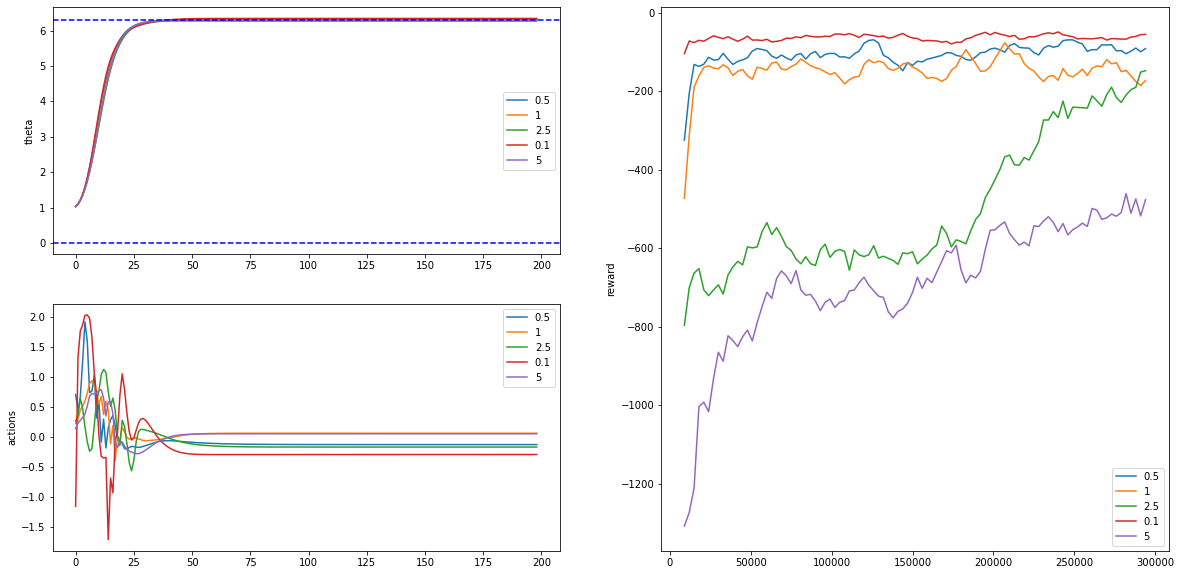

In [15]:
label = "eps"

def plot_eval():
    plt.figure()
    trial_id = 0
    matches = filt(check)
    for combo in matches.values():
        rew = []
        with open(os.path.join(os.path.join("./Runs", combo[0]), "params.pkl"), 'rb') as f:
            params = pickle.load(f) 
            
        plot = True #plot only one
        for folder in combo:
            results = run_eval.evaluate(folder, env='pendulum', init=[1, 0])
            tb = results["pendulum"]["mean_reward"]
            tb_times = tb[0]
            tb_rew = [a[0] for a in tb[1]]
            
            rew.append(tb_rew)

            if plot:
                thetas = results["pendulum"]["states"][:, 0]
                actions = results["pendulum"]["actions"]
            
                plt.subplot(221)
                plt.plot(thetas, label=str(params[label]))
                plt.subplot(223)
                plt.plot(actions, label=str(params[label]))
                plot = False
            
        rew_avg = np.mean(rew, axis=0)        
        n=5
        tb_smoothed = np.cumsum(rew_avg, dtype=float)
        tb_smoothed[n:] = tb_smoothed[n:] - tb_smoothed[:-n]
        tb_smoothed =  tb_smoothed[n - 1:] / n
        
        plt.subplot(122)
        plt.plot(tb_times[(n//2):-(n//2)], tb_smoothed, label=str(params[label]))
        


    plt.subplot(122)
    plt.ylabel("reward")
    plt.legend()
    plt.subplot(221)
    plt.axhline(y=0, color='b', linestyle='--')
    plt.axhline(y=2*np.pi, color='b', linestyle='--')
    plt.ylabel("theta")
    plt.legend()
    plt.subplot(223)
    plt.ylabel("actions")
    plt.legend()
    plt.show()
        
plot_eval()

### PVTOL

/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN',

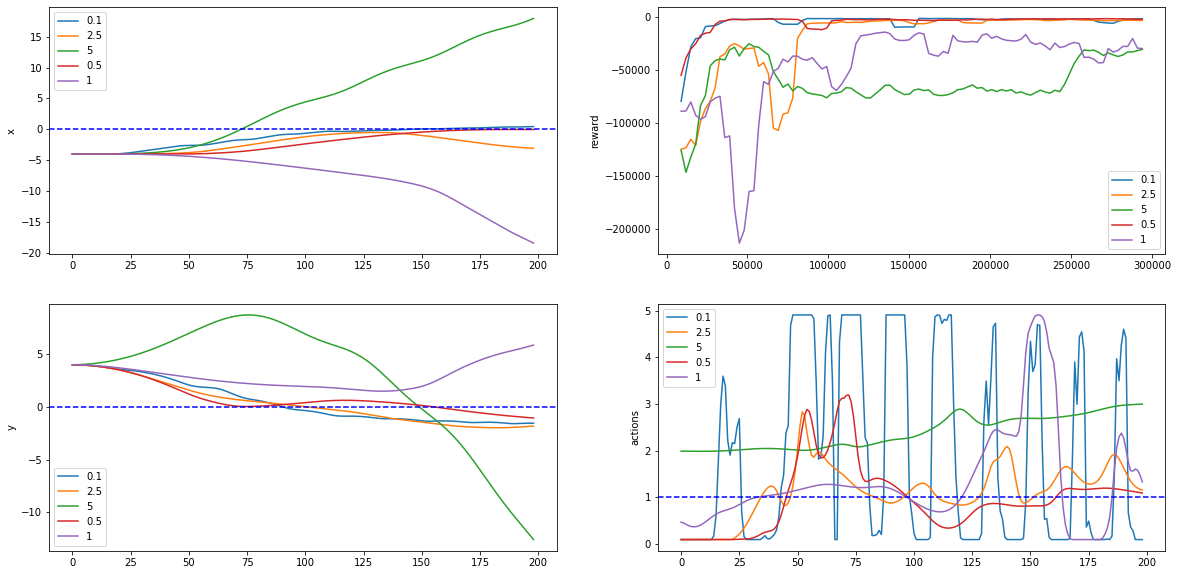

In [35]:
label = "eps"

def plot_eval():
    plt.figure()
    trial_id = 0
    matches = filt(check)
    for combo in matches.values():
        rew = []
        with open(os.path.join(os.path.join("./Runs", combo[0]), "params.pkl"), 'rb') as f:
            params = pickle.load(f) 
            
        plot = True #plot only one
        for folder in combo:
            results = run_eval.evaluate(folder, env='pvtol', init=[-4, 4, 0, 0, 0, 0])
            tb = results["pvtol"]["mean_reward"]
            tb_times = tb[0]
            tb_rew = [a[0] for a in tb[1]]
            
            rew.append(tb_rew)

            if plot:
                x = results["pvtol"]["states"][:, 0]
                y = results["pvtol"]["states"][:, 1]
                actions = results["pvtol"]["actions"]
            
                plt.subplot(221)
                plt.plot(x, label=str(params[label]))
                plt.subplot(223)
                plt.plot(y, label=str(params[label]))
                plt.subplot(224)
                plt.plot(actions, label=str(params[label]))
                plot = False
            
        rew_avg = np.mean(rew, axis=0)        
        n=5
        tb_smoothed = np.cumsum(rew_avg, dtype=float)
        tb_smoothed[n:] = tb_smoothed[n:] - tb_smoothed[:-n]
        tb_smoothed =  tb_smoothed[n - 1:] / n
        
        plt.subplot(222)
        plt.plot(tb_times[(n//2):-(n//2)], tb_smoothed, label=str(params[label]))
        


    plt.subplot(222)
    plt.ylabel("reward")
    plt.legend()
    plt.subplot(221)
    plt.axhline(y=0, color='b', linestyle='--')
    plt.ylabel("x")
    plt.legend()
    plt.subplot(223)
    plt.axhline(y=0, color='b', linestyle='--')
    plt.ylabel("y")
    plt.legend()
    plt.subplot(224)
    plt.axhline(y=1, color='b', linestyle='--')
    plt.ylabel("actions")
    plt.legend()
    plt.show()
        
plot_eval()

### Cartpole

/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN',

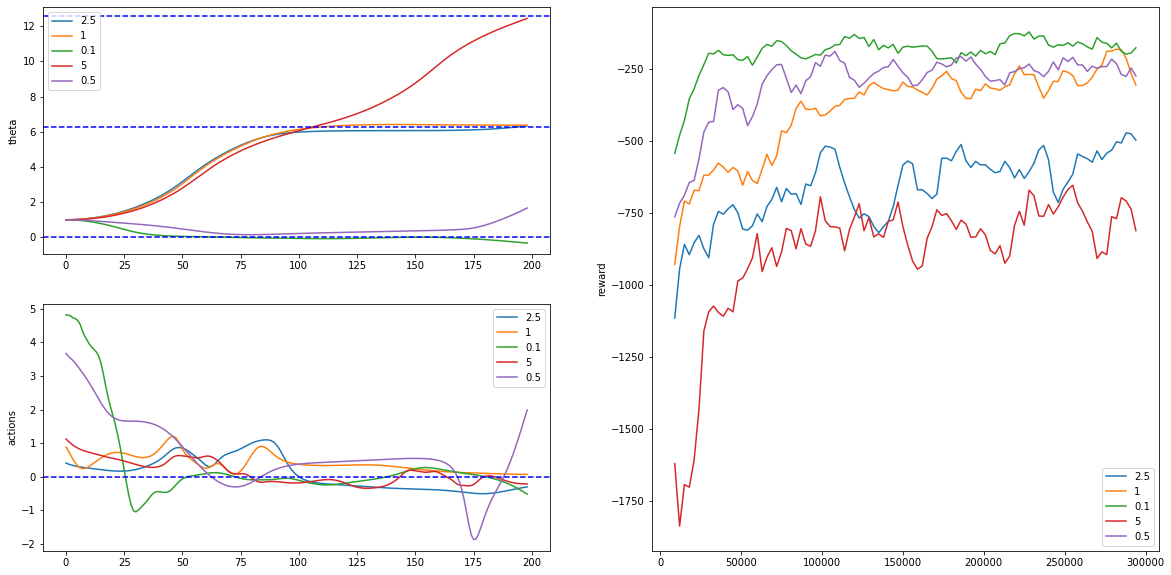

In [20]:
label = "eps"

def plot_eval():
    plt.figure()
    trial_id = 0
    matches = filt(check)
    for combo in matches.values():
        rew = []
        with open(os.path.join(os.path.join("./Runs", combo[0]), "params.pkl"), 'rb') as f:
            params = pickle.load(f) 
            
        plot = True #plot only one
        for folder in combo:
            results = run_eval.evaluate(folder, env='cartpole', init=[0, 1, 0, 0])
            tb = results["cartpole"]["mean_reward"]
            tb_times = tb[0]
            tb_rew = [a[0] for a in tb[1]]
            
            rew.append(tb_rew)

            if plot:
                theta = results["cartpole"]["states"][:, 1]
                actions = results["cartpole"]["actions"]
            
                plt.subplot(221)
                plt.plot(theta, label=str(params[label]))
                plt.subplot(223)
                plt.plot(actions, label=str(params[label]))
                plot = False
            
        rew_avg = np.mean(rew, axis=0)        
        n=5
        tb_smoothed = np.cumsum(rew_avg, dtype=float)
        tb_smoothed[n:] = tb_smoothed[n:] - tb_smoothed[:-n]
        tb_smoothed =  tb_smoothed[n - 1:] / n
        
        plt.subplot(122)
        plt.plot(tb_times[(n//2):-(n//2)], tb_smoothed, label=str(params[label]))
        


    plt.subplot(122)
    plt.ylabel("reward")
    plt.legend()
    plt.subplot(221)
    plt.axhline(y=0, color='b', linestyle='--')
    plt.axhline(y=2*np.pi, color='b', linestyle='--')
    plt.axhline(y=4*np.pi, color='b', linestyle='--')
    plt.ylabel("theta")
    plt.legend()
    plt.subplot(223)
    plt.axhline(y=0, color='b', linestyle='--')
    plt.ylabel("actions")
    plt.legend()
    plt.show()
        
plot_eval()

# Rendering Station

DON"T USE YET, BEHAVIOR NOT WORKING

In [2]:
folder = '03_19_2022_025744_Mohsin'
env_name = 'manipulator'
model_name = 'best_model'

run_render.render(folder, env_name, model_name)

/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
2022-03-20 15:00:41.922 python[99162:6383413] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f9457883420>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-20 15:00:41.922 python[99162:6383413] Warning: Expected min height of view: (<NSButton: 0x7f94578c32d0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-20 15:00:41.924 python[99162:6383413] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f94578b53d0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-20 15:00:41.925 python[99162:6383413] Warning: Expected min he

In [4]:
folder = '03_19_2022_025744_Mohsin'
env_name = 'manipulator'
model_name = 'best_model'

with open(os.path.join(os.path.join("./Runs", folder), "params.pkl"), 'rb') as f:
    params = pickle.load(f)
env = params.envs[env_name].eval_env(params)
env.reset()
models_path = os.path.join(os.path.join("./Runs", folder), env_name + "/models")
model = SAC.load(os.path.join(models_path, model_name))

obs = env.reset()
done = False
i = 0
while not done:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()
print("hello")
env.close()

/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
2022-03-20 15:18:16.269 python[99428:6392369] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f78c6e65e30>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-20 15:18:16.269 python[99428:6392369] Warning: Expected min height of view: (<NSButton: 0x7f78c6e88fc0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-20 15:18:16.271 python[99428:6392369] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f78c6e43310>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-03-20 15:18:16.272 python[99428:6392369] Warning: Expected min he

hello
